In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("xAPI-Edu-Dataset.csv")

In [3]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
data.shape

(480, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
data.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [ ]:
#1. Create a Dataframe from the given data, perform basic EDA and check if data cleaning is required.

In [8]:
data.isnull().values.any()

False

it does not require cleaning becuse it does not contain null values.


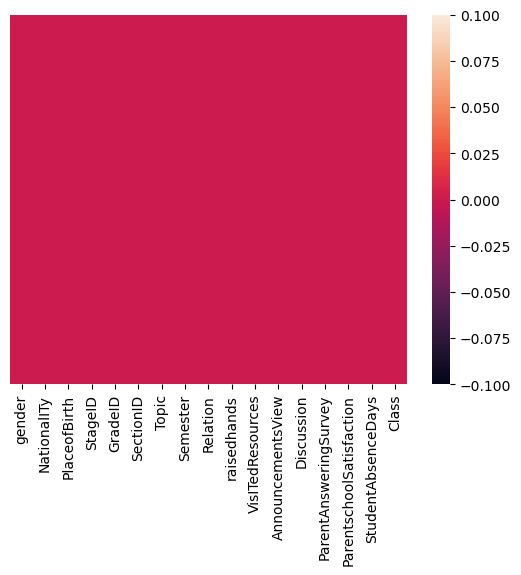

In [9]:
sns.heatmap(data.isnull(),yticklabels=False)
print("it does not require cleaning becuse it does not contain null values.")

In [11]:
#null
data.isnull().sum()
print("it does not have no nulls")

it does not have no nulls


In [13]:
print("ques2 Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?"
     )

ques2 Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?


<Axes: xlabel='Semester', ylabel='count'>

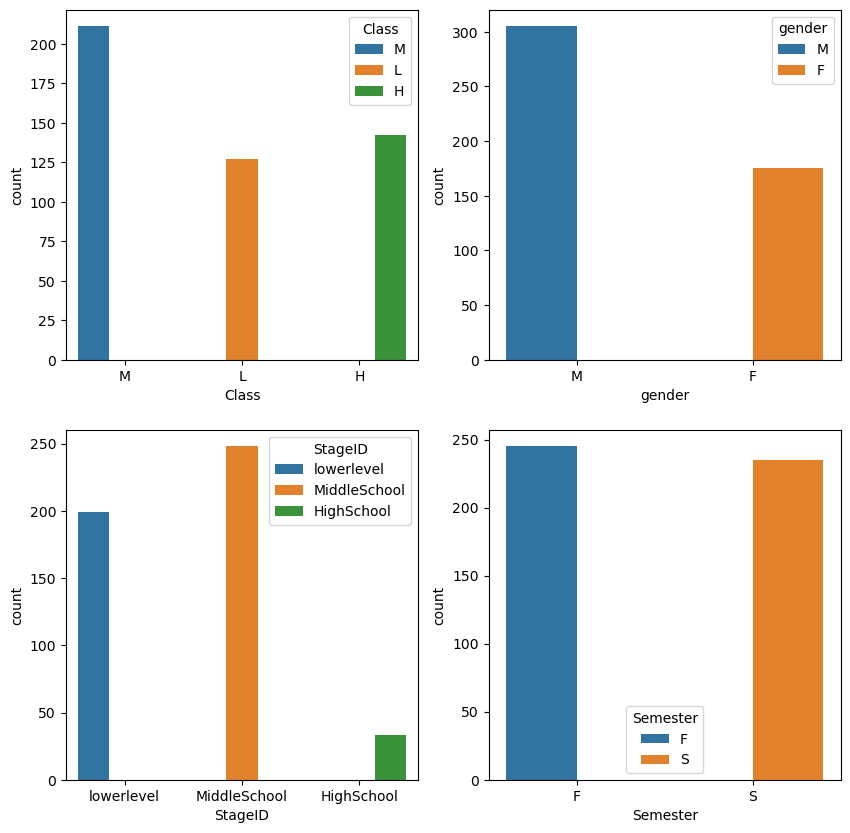

In [12]:
fig,axarr= plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class',data=data, ax=axarr[0,0],hue='Class')#'M':1,'F':0
sns.countplot(x='gender',data=data, ax=axarr[0,1],hue='gender')#'M':2,'L':1,'H':0
sns.countplot(x='StageID',data=data, ax=axarr[1,0],hue='StageID')#'lowerlevel':2,'MiddleSchool':1,'HighSchool':0
sns.countplot(x='Semester',data=data, ax=axarr[1,1],hue='Semester')#'F':1,'S':0

In [14]:
# 3. Look at some categorical features in relation to each other, to see what insights could be possibly read?

<Axes: xlabel='gender', ylabel='count'>

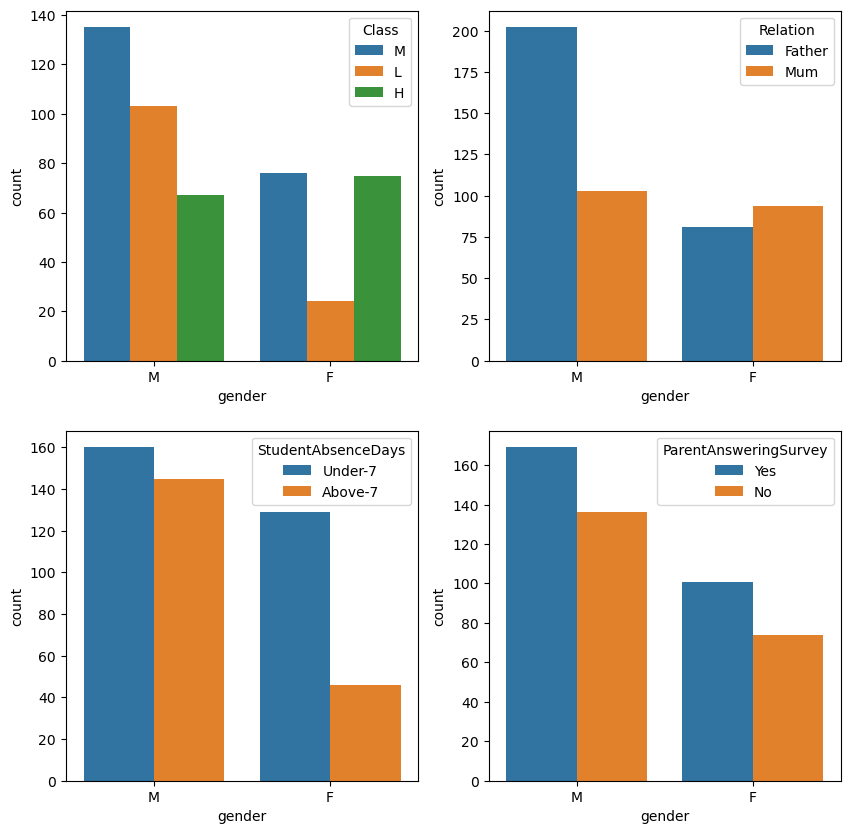

In [15]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1])

<Axes: xlabel='Topic', ylabel='count'>

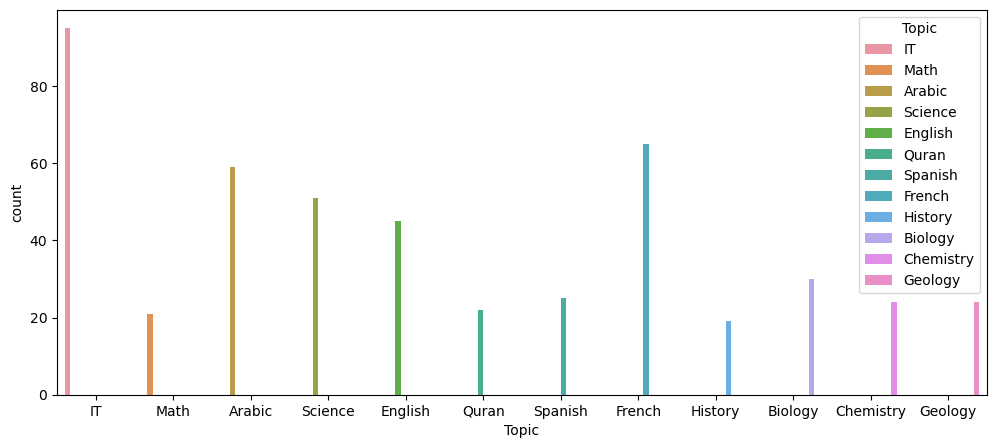

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x='Topic', data=data, hue='Topic')

<Axes: xlabel='NationalITy', ylabel='count'>

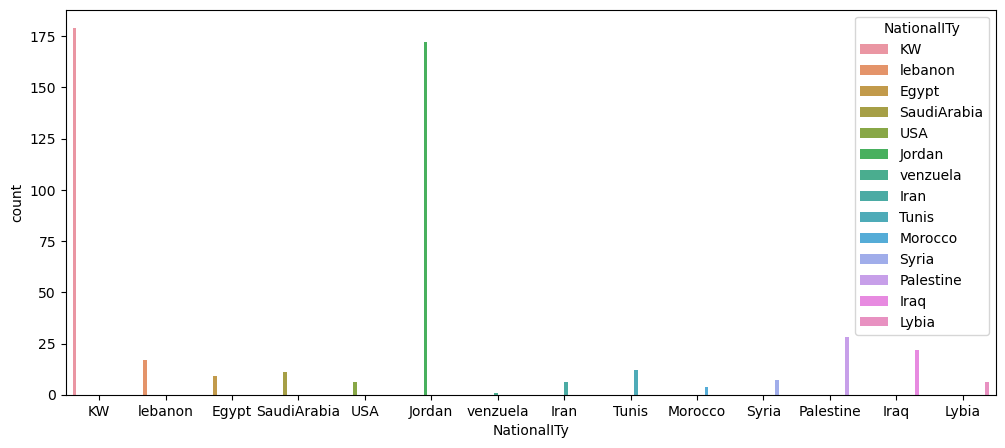

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(x='NationalITy',data=data,hue='NationalITy')

In [18]:
# 4. Visualize categorical variables with numerical variables and give conclusion?

<Axes: xlabel='Class', ylabel='Discussion'>

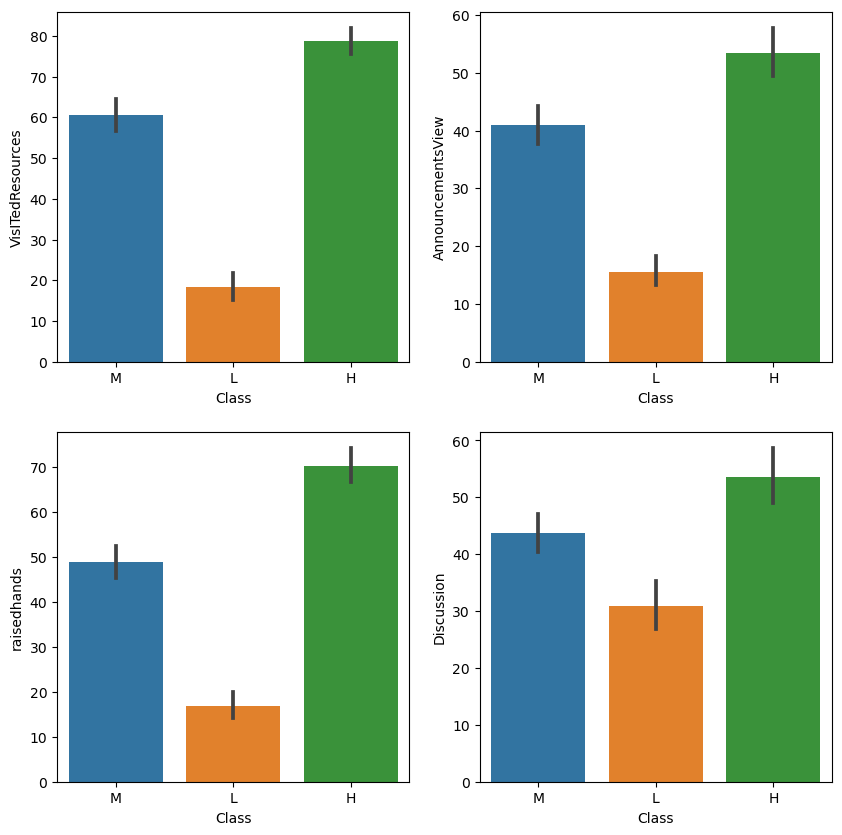

In [19]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=data, ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, ax=axarr[1,1])

<Axes: xlabel='Semester', ylabel='AnnouncementsView'>

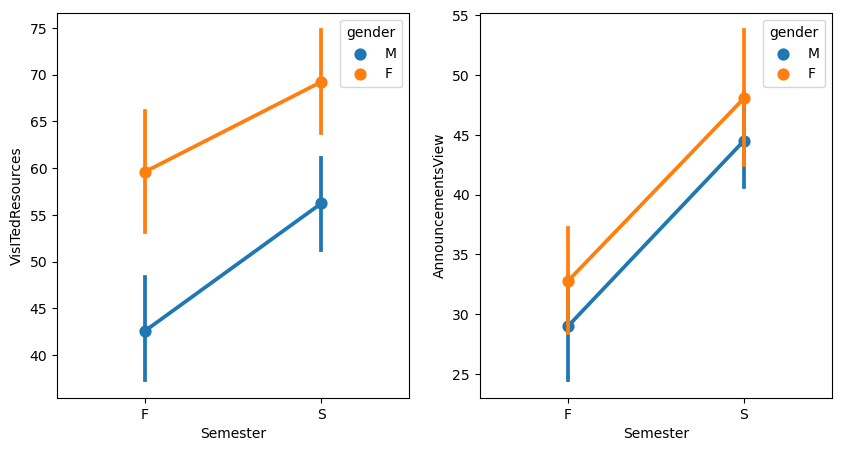

In [20]:
#5.-From-the-above-result,-what-are-the-factors-that-leads-to-get-low-grades-of-the-students?fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=data, ax=axis2)

In [21]:

print("Students who actively participated more in discussions, raised their hands, viewed announcements, and accessed resources performed better academically. Interestingly, during the second semester, students seemed to be more diligent in visiting resources and viewing announcements, possibly driven by the desire to improve their final grades.")

Students who actively participated more in discussions, raised their hands, viewed announcements, and accessed resources performed better academically. Interestingly, during the second semester, students seemed to be more diligent in visiting resources and viewing announcements, possibly driven by the desire to improve their final grades.


In [22]:
ave_raisedhands = sum(data['raisedhands'])/len(data['raisedhands'])
ave_VisITedResources = sum(data['VisITedResources'])/len(data['VisITedResources'])
ave_AnnouncementsView = sum(data['AnnouncementsView'])/len(data['AnnouncementsView'])
unsuccess = data.loc[(data['raisedhands'] >= ave_raisedhands) & (data['VisITedResources']>=ave_VisITedResources) & (data['AnnouncementsView']>=ave_AnnouncementsView)  & (data['Class'] == 'L')]


In [23]:
unsuccess

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


In [24]:
#5. From the above result, what are the factors that leads to get low grades of the students?

In [25]:
data['numeric_class'] = [1 if data.loc[i,'Class'] == 'L' else 2 if data.loc[i,'Class'] == 'M' else 3 for i in range(len(data))]

In [29]:
grade_male_ave = sum(data[data.gender == 'M'].numeric_class)/float(len(data[data.gender == 'M']))
grade_female_ave = sum(data[data.gender == 'F'].numeric_class)/float(len(data[data.gender == 'F']))


In [30]:
print("Gender comparison cannot completely explain low level grades")

Gender comparison cannot completely explain low level grades


Jordan average: 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

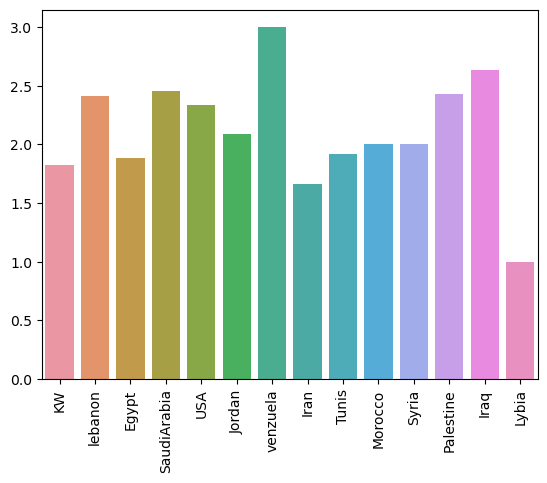

In [31]:
#  nationality
nation = data.NationalITy.unique()
nation_grades_ave = [sum(data[data.NationalITy == i].numeric_class)/float(len(data[data.NationalITy == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(data[data.NationalITy == 'Jordan'].numeric_class)/float(len(data[data.NationalITy == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)

In [32]:
print("The bar plot clearly demonstrates that Jordan has a positive influence on these two students, as it is ranked seventh with an average of 2.09.")

The bar plot clearly demonstrates that Jordan has a positive influence on these two students, as it is ranked seventh with an average of 2.09.


Text(0.5, 1.0, 'Relation with father or mother affects success of students')

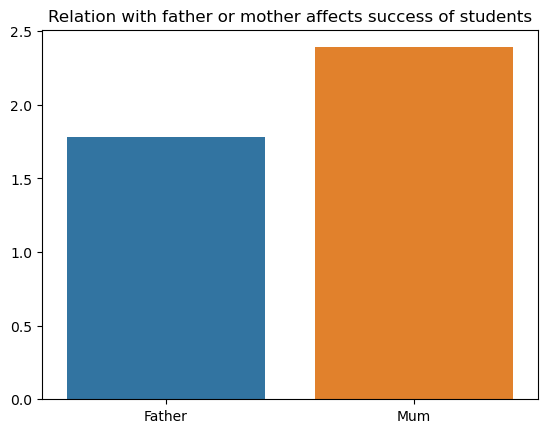

In [34]:
# Lets look at relation with family members
relation = data.Relation.unique()
relation_grade_ave = [sum(data[data.Relation == i].numeric_class)/float(len(data[data.Relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

In [35]:
print("Having relation with mum has positive effect on these students")

Having relation with mum has positive effect on these students


Text(0.5, 1.0, 'Discussion group participation')

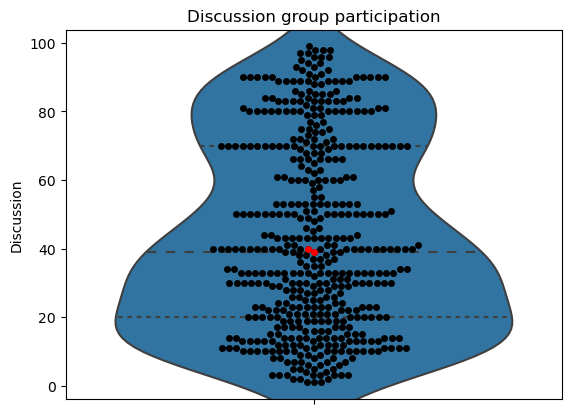

In [36]:
#Lets look at how many times the student participate on discussion groups
discussion = data.Discussion
discussion_ave = sum(discussion)/len(discussion)
ax = sns.violinplot(y=discussion,split=True,inner='quart')
ax = sns.swarmplot(y=discussion,color='black')
ax = sns.swarmplot(y = unsuccess.Discussion, color='red')
plt.title('Discussion group participation')

Text(0.5, 1.0, 'Success effect')

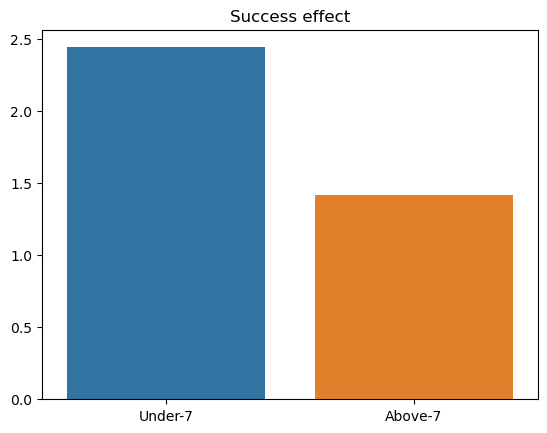

In [40]:
# Now lastly lets look at
absence_day = data.StudentAbsenceDays.unique()
absense_day_ave = [sum(data[data.StudentAbsenceDays == i].numeric_class)/float(len(data[data.StudentAbsenceDays == i])) for i in absence_day]
ax = sns.barplot(x=absence_day, y=absense_day_ave)
plt.title('Success effect')

In [41]:
print("These two students are under the average of discussion (43). Therefore, not participating in discussion groups can be important reason to get low grades Their absence days are above seven which resulted in low grades")

These two students are under the average of discussion (43). Therefore, not participating in discussion groups can be important reason to get low grades Their absence days are above seven which resulted in low grades


In [42]:
#6. Build classification model using Logistic Regression and present it's confusion matrix and classification report.

In [44]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2


In [46]:
data_new = data.drop('Class',axis = 1)
data_with_dummies = pd.get_dummies(data_new, drop_first=True)

In [47]:
data_with_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,2,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [48]:
Features = data_with_dummies.drop(['numeric_class'],axis = 1)
Target = data_with_dummies['numeric_class']

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)

StandardScaler()

In [50]:
X = scaler.fit_transform(Features)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=45)


In [52]:
from sklearn.linear_model import LogisticRegression

Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = Logit_Model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
Score = accuracy_score(y_test,y_pred)
Report = classification_report(y_test,y_pred)
y_pred

array([2, 2, 3, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 3,
       2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 2, 1, 2, 1, 3, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1,
       3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 2, 1, 1, 1, 3, 2, 2, 1, 2, 2], dtype=int64)

In [54]:
Score

0.7361111111111112

In [55]:
Report

'              precision    recall  f1-score   support\n\n           1       0.76      0.87      0.81        30\n           2       0.78      0.70      0.74        74\n           3       0.65      0.70      0.67        40\n\n    accuracy                           0.74       144\n   macro avg       0.73      0.76      0.74       144\nweighted avg       0.74      0.74      0.74       144\n'

In [56]:
Target.value_counts()

2    211
3    142
1    127
Name: numeric_class, dtype: int64

In [57]:
#7. Justify the model. Tune the model using various techniques, if need be.

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=None, step=1, verbose=0,
                              importance_getter='auto')
rfe = rfe.fit(Features, Target)

In [59]:
selected_features=Features.columns[rfe.support_]
X_rfe = Features[selected_features]

In [60]:
# Model building with RFE
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_rfe,Target, test_size = 0.30, random_state = 10)

clf = LogisticRegression()
# fit the model on scaled training data
logreg_with_rfe = clf.fit(X_train, y_train)

# use predict() to predict the class labels of target variable
y_pred = logreg_with_rfe.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)

[[25 14  0]
 [10 53  7]
 [ 1 12 22]]
              precision    recall  f1-score   support

           1       0.69      0.64      0.67        39
           2       0.67      0.76      0.71        70
           3       0.76      0.63      0.69        35

    accuracy                           0.69       144
   macro avg       0.71      0.68      0.69       144
weighted avg       0.70      0.69      0.69       144



In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=30).fit_transform(Features, Target)

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_new, Target, test_size = 0.30, random_state = 10)

clf = LogisticRegression()
# fit the model on scaled training data
logreg_with_Kbest = clf.fit(X_train, y_train)

# use predict() to predict the class labels of target variable
y_pred = logreg_with_Kbest.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)

[[30  9  0]
 [ 5 54 11]
 [ 0  9 26]]
              precision    recall  f1-score   support

           1       0.86      0.77      0.81        39
           2       0.75      0.77      0.76        70
           3       0.70      0.74      0.72        35

    accuracy                           0.76       144
   macro avg       0.77      0.76      0.76       144
weighted avg       0.77      0.76      0.76       144



In [62]:
#varience threshold

In [65]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np 

var = VarianceThreshold(threshold=0.025)
X_trans = var.fit_transform(Features)

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_trans,Target, test_size = 0.30, random_state = 10)

clf = LogisticRegression()
# fit the model on scaled training data
logreg_with_var_thresh = clf.fit(X_train, y_train)

# use predict() to predict the class labels of target variable
y_pred = logreg_with_var_thresh.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)
print(" we can conclude that by variance thresholding techniques we are getting better model")

[[31  8  0]
 [ 5 55 10]
 [ 0  9 26]]
              precision    recall  f1-score   support

           1       0.86      0.79      0.83        39
           2       0.76      0.79      0.77        70
           3       0.72      0.74      0.73        35

    accuracy                           0.78       144
   macro avg       0.78      0.77      0.78       144
weighted avg       0.78      0.78      0.78       144

 we can conclude that by variance thresholding techniques we are getting better model
